# 聚合：最小值、最大值和其他值

In [1]:
import numpy as np

np.random.seed(0)

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## 1. 数组值求和

In [3]:
L = np.random.random(100)
print(sum(L))     # Python内建的函数
print(np.sum(L))  # NumPy的函数

47.27938395125176
47.279383951251766


In [4]:
# 由于NumPy 的 sum 函数在编译码中执行操作，所以 NumPy 的操作计算得更快一些
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

156 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
965 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 2. 最大值和最小值

In [5]:
print(min(big_array), max(big_array))        # Python内建的函数
print(np.min(big_array), np.max(big_array))  # NumPy的函数

7.071203171893359e-07 0.9999997207656334
7.071203171893359e-07 0.9999997207656334


In [6]:
%timeit min(big_array)
%timeit np.min(big_array)

94.1 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
916 µs ± 39.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
# 对于 min、max、sum 和其他 NumPy 聚合，一种更简洁的语法形式是数组对象直接调用这些方法：
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500385.0874907551


### 2.1. 多维度聚合

In [8]:
M = np.random.random((3,4))
print(M)

[[0.65527872 0.53859662 0.1160128  0.88693339]
 [0.78005386 0.29509276 0.23792159 0.36427966]
 [0.28696762 0.13911998 0.81564486 0.33446842]]


In [9]:
print(M.sum())        # 默认情况下，每一个 NumPy 聚合函数将会返回对整个数组的聚合结果
print(M.min(axis=0))  # 聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合
print(M.max(axis=1))  # axis 关键字指定的是数组将会被折叠的维度，而不是将要返回的维度，因此指定 axis=0 意味着第一个轴将要被折叠

5.450370274366079
[0.28696762 0.13911998 0.1160128  0.33446842]
[0.88693339 0.78005386 0.81564486]


### 2.2. 其他聚合函数

**NumPy中可用的聚合函数**

| 函数名称 | NaN安全版本 | 描述 |
| -- | -- | -- |
| np.sum | np.nansum | 计算元素的和 |
| np.prod | np.nanprod | 计算元素的积 |
| np.mean | np.nanmean | 计算元素的平均值 |
| np.std | np.nanstd | 计算元素的标准差 |
| np.var | np.nanvar | 计算元素的方差 |
| np.min | np.nanmin | 找出最小值 |
| np.max | np.nanmax | 找出最大值 |
| np.argmin | np.nanargmin | 找出最小值的索引 |
| np.argmax | np.nanargmax | 找出最大值的索引 |
| np.median | np.nanmedian | 计算元素的中位数 |
| np.percentile | np.nanpercentile | 计算基于元素排序的统计值 |
| np.any | N/A | 验证是否存在元素为真 |
| np.all | N/A | 验证所有元素是否为真 |

## 3. 示例：美国总统的身高是多少

In [10]:
!head -4 ../data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [11]:
import pandas as pd

data = pd.read_csv('../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [12]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193
25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


Text(0, 0.5, 'number')

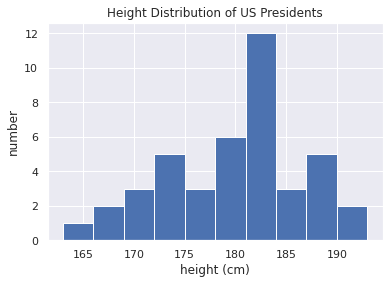

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格

plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')